## Logistic Regression Project

Bootcamp: https://github.com/SuvroBaner/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/master/11.%20Logistic-Regression/Logistic%20Regression%20Project%20.ipynb

## Data Info:

Fake advertising data set indicating whether or not not a particular internet user clicked on an Advertisement

We will try to create a model that will predict whether or not they will click on an Ad based on the features of that user

- Daily Time Spent on Site: consumer time on site in minutes
- Age: consumer age in years
- Area Income: Avg. Income of geographical area of consumer
- Daily Internet Usage: Avg. minutes a day consumer is on the internet
- Ad Topic Line: Headline of the advertisement
- City: City of consumer
- Male: Wheter or not consumer was male
- Country: Country of consumer
- Timestamp: Time at which consumer clicked on Ad or closed window
- Clicked on Ad: 0 or 1 indicated clicling on Ad

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from pandas_profiling import ProfileReport


%matplotlib inline

#### Getting the data

In [4]:
ad_data = pd.read_csv("advertising.csv")

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Pandas Profiling Report

In [6]:
profile = ProfileReport(ad_data)
profile.to_file("Advertising_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Using info and describe methods

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

#### Missing Data

<AxesSubplot:>

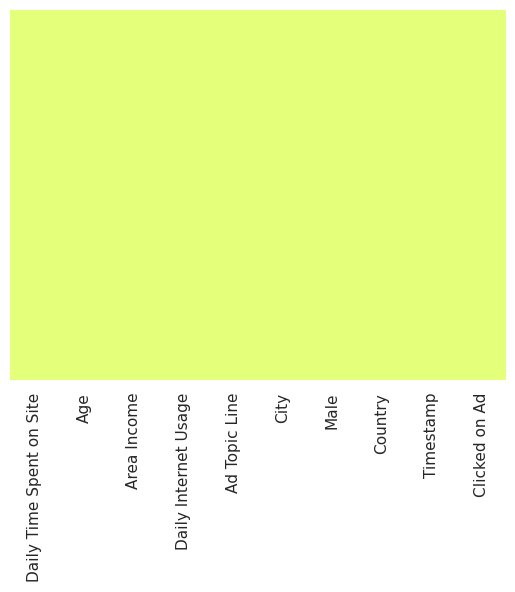

In [11]:
sns.heatmap(ad_data.isnull(), cbar=False, cmap="Wistia", yticklabels=False)

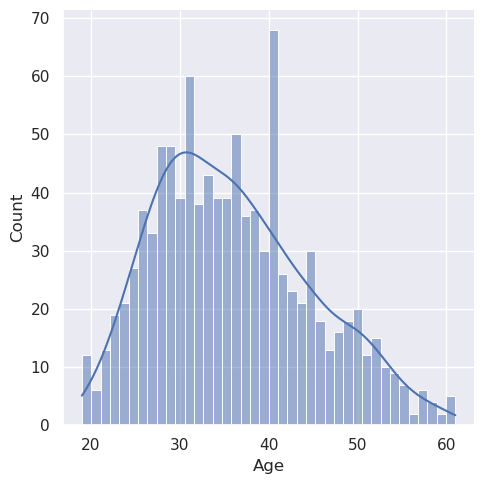

In [15]:
sns.displot(
    data=ad_data, x="Age", kde=True, bins=40
)

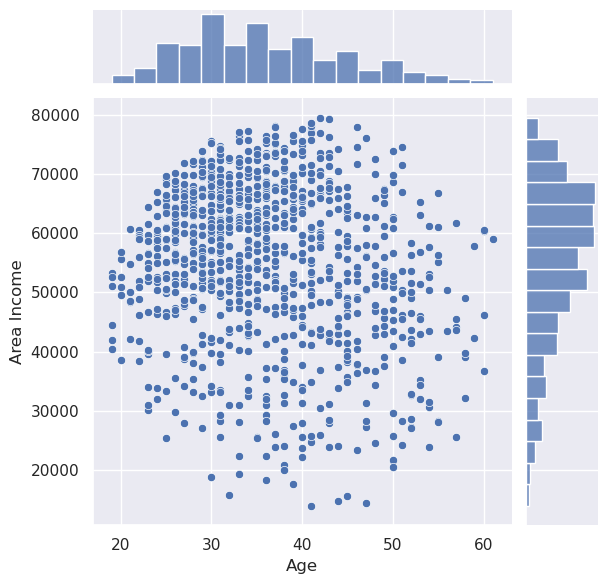

In [17]:
sns.jointplot(
    data=ad_data, x="Age", y="Area Income"
)

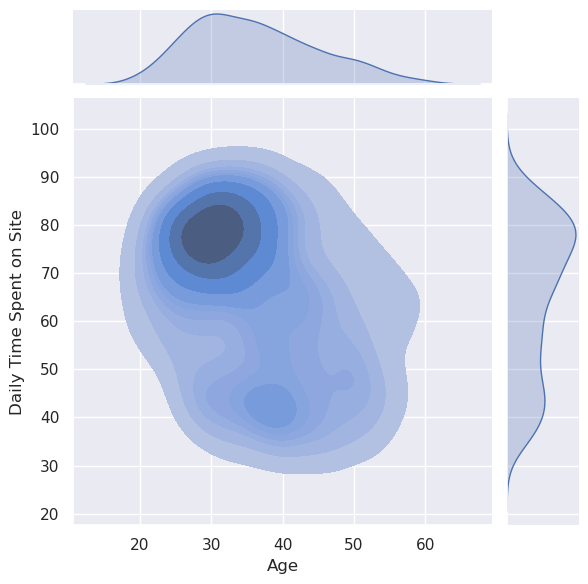

In [26]:
sns.jointplot(
    data=ad_data, x="Age", y="Daily Time Spent on Site",
    kind="kde", fill=True
)

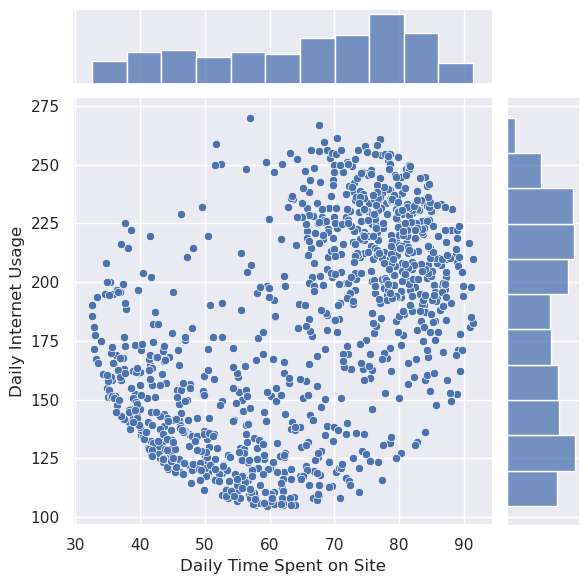

In [27]:
sns.jointplot(
    data=ad_data, x="Daily Time Spent on Site",
    y="Daily Internet Usage"
)

<AxesSubplot:xlabel='Male', ylabel='count'>

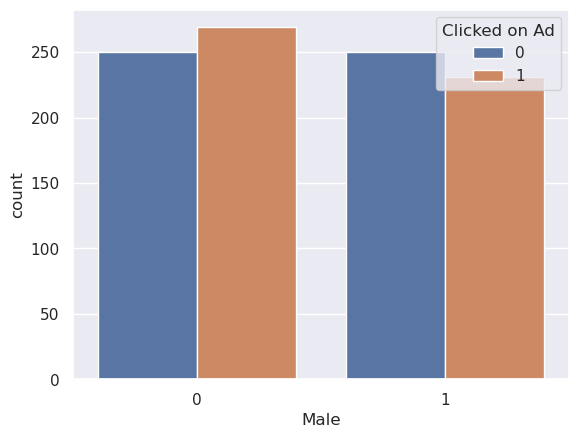

In [31]:
sns.countplot(
    data=ad_data, x="Male", hue="Clicked on Ad"
)

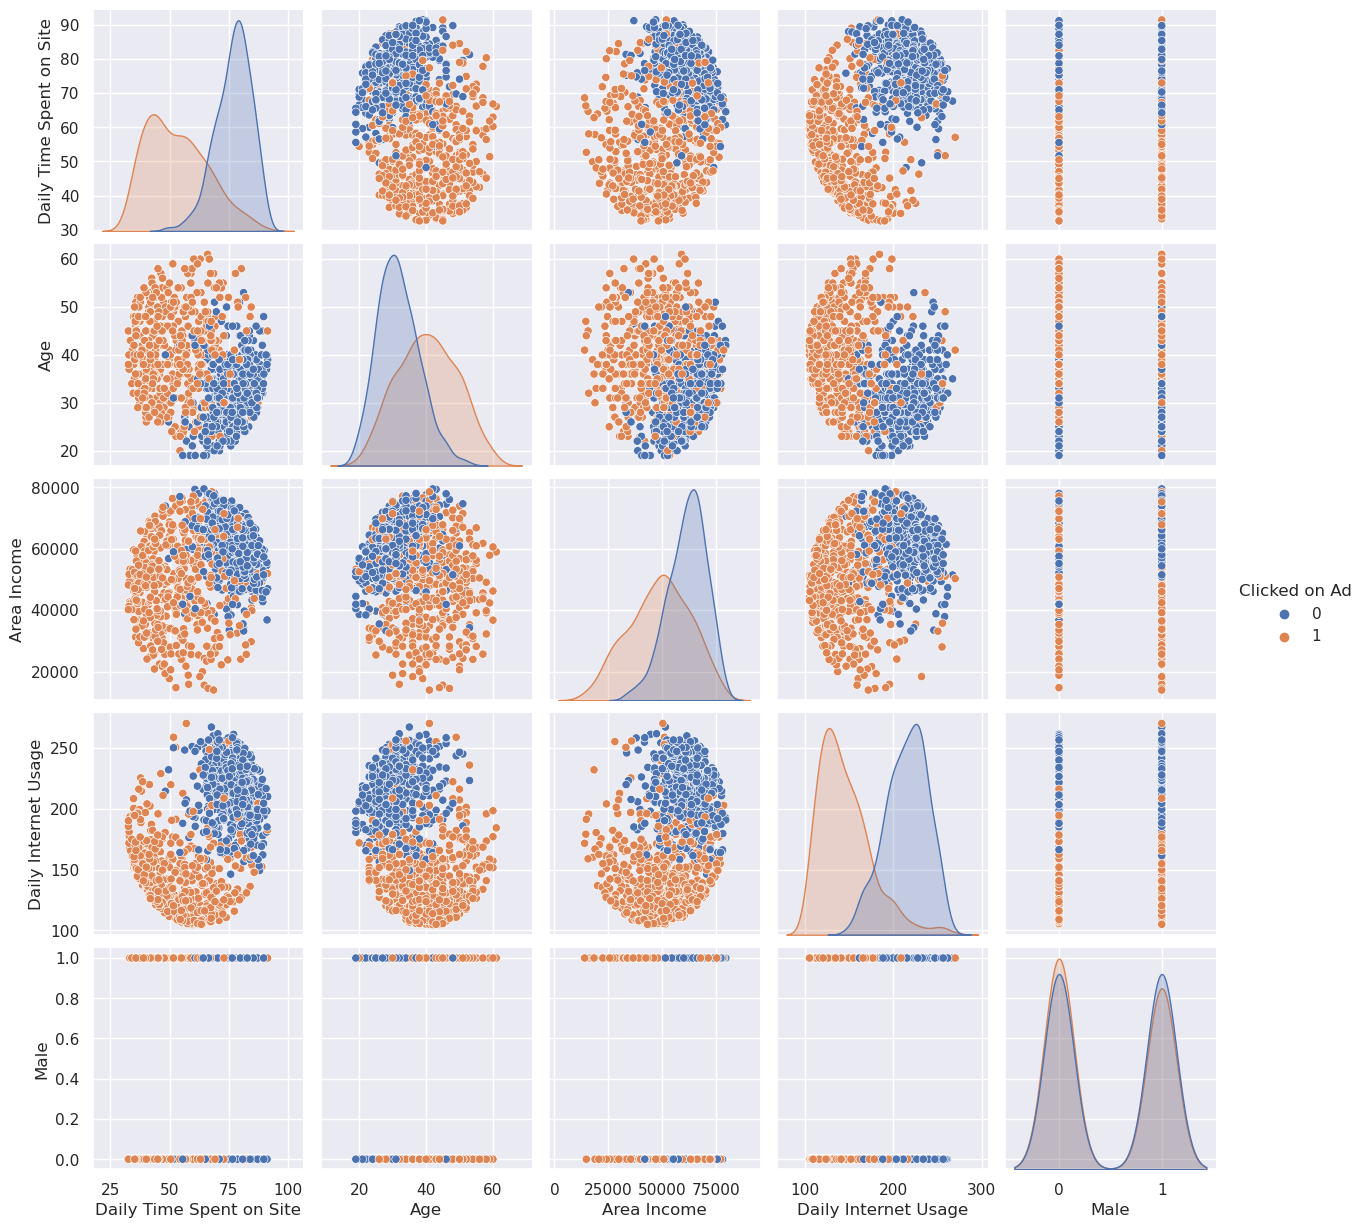

In [29]:
sns.pairplot(
    data=ad_data, hue="Clicked on Ad"
)

#### Correlations

#### Pearson's correlation

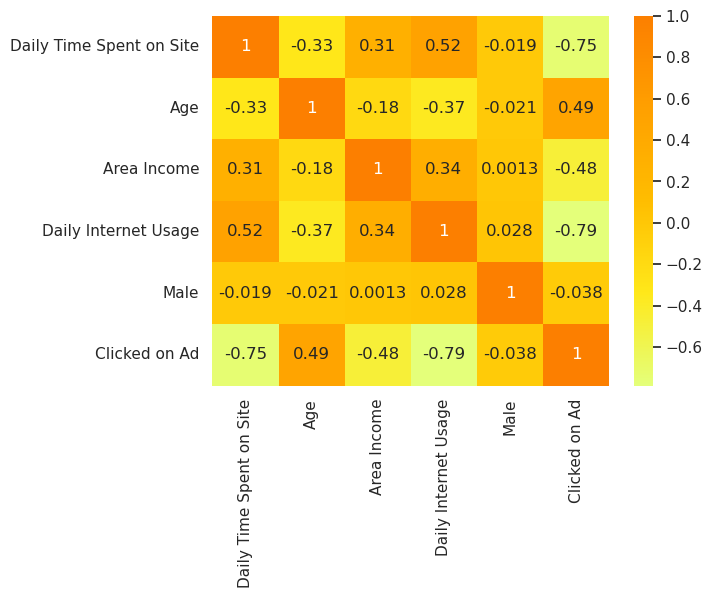

In [35]:
sns.heatmap(ad_data.corr(), cmap="Wistia", annot=True)
corr_matrix = ad_data.corr()

In [37]:
corr_matrix["Clicked on Ad"].sort_values(ascending=False)

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

#### Spearman's correlation

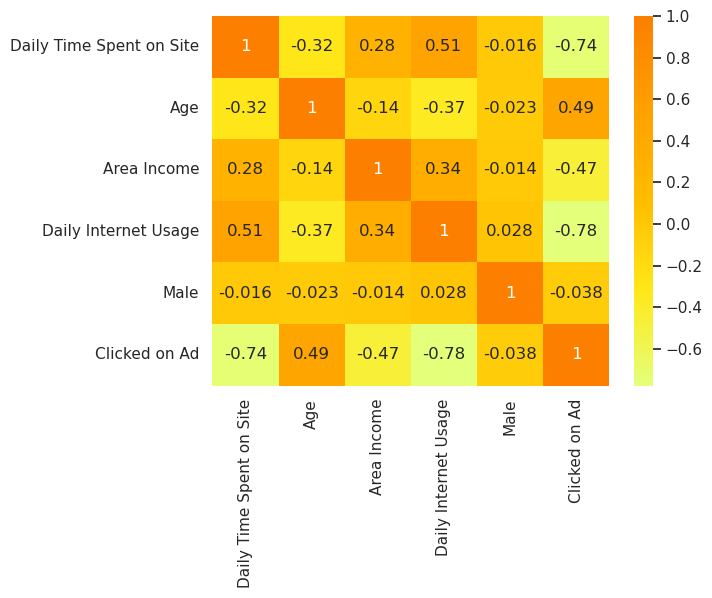

In [38]:
sns.heatmap(ad_data.corr(method="spearman"), cmap="Wistia", annot=True)
corr_matrix = ad_data.corr()

In [39]:
corr_matrix["Clicked on Ad"].sort_values(ascending=False)

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

#### Logistic Regression

#### X and Y features

In [40]:
X = ad_data[["Age", "Male", "Area Income", "Daily Time Spent on Site",
             "Daily Internet Usage"]]

In [41]:
y = ad_data["Clicked on Ad"]

#### Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training and Predicting

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model = LogisticRegression()

In [47]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
predictions = log_model.predict(X_test)

#### Evaluate Model

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

